In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, welch, butter, sosfiltfilt
from scipy.fft import fftshift
from scipy.io import wavfile
from matplotlib.colors import NoNorm

%matplotlib inline

In [2]:
df = pd.read_csv('calls_71002.csv')

In [3]:
df.head()

,USV_id,Rec_id,type_id,Nlx_time,duration,contact,emitter,emitter_sex,side,recipient_sex,Nlx_adjusted,onset_phase,rat_intensity,rat_cluster,emitter_cluster
0,288954,71002,5,2440668.90,37.23,0,I,m,NaN,NaN,2440668.90,NaN,NaN,NaN,NaN
1,288955,71002,8,2482198.22,42.89,0,I,m,NaN,NaN,2482198.22,NaN,NaN,NaN,NaN
2,288956,71002,5,2515219.72,24.27,0,I,m,NaN,NaN,2515219.72,NaN,NaN,NaN,NaN
3,288957,71002,1,2515247.00,27.50,0,I,m,NaN,NaN,2515247.00,NaN,NaN,NaN,NaN
4,288958,71002,8,2546132.79,45.84,0,I,m,NaN,NaN,2546132.79,NaN,NaN,NaN,NaN


In [4]:
fs, x = wavfile.read('ch1_T0000002.WAV')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


In [5]:
sos = butter(4, (20000,120000), btype='bandpass', output='sos',fs=fs)

In [6]:
x_filt = sosfiltfilt(sos, x)

In [8]:
call_start_list = df['Nlx_adjusted']

In [21]:
call_start_list

0      2440668.90
1      2482198.22
2      2515219.72
3      2515247.00
4      2546132.79
          ...    
195    3147903.57
196    3154891.04
197    3209019.50
198    3217387.68
199    3217681.98
Name: Nlx_adjusted, Length: 200, dtype: float64

In [38]:
def gen_psd(df):
    rec_start = 2322997.487
    call_start_list = df['Nlx_adjusted']
    for call_start in call_start_list:
        spec_begin = (call_start - rec_start) * 250
        spec_end = spec_begin + 25000
        f, Pxx = welch(x_filt[int(spec_begin):int(spec_end)], fs, window='blackmanharris', nperseg=500, noverlap=400, nfft=500)
        if Pxx.max() > 0.4:
            f, t, Sxx = spectrogram(x_filt[int(spec_begin):int(spec_end)], fs, nfft=500, noverlap=400, nperseg=500, window='blackmanharris')
            plt.pcolormesh(t, f, Sxx, cmap='gray_r',norm=NoNorm())
            plt.axis(ymin=20000, ymax=120000)
            plt.axis('off')
            plt.savefig(f'test/{call_start}.png', bbox_inches='tight', pad_inches=0)

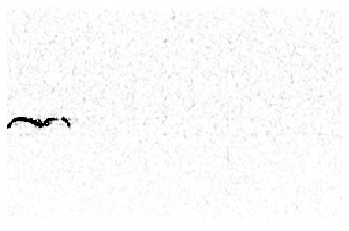

In [39]:
gen_psd(df)